In [1]:
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
df=pd.read_csv(r'C:\Users\ERIA\Downloads\AirPassengers.csv')
df.head()

Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

In [4]:
df.rename(columns={'Month': 'ds','#Passengers': 'y'}, inplace=True)

In [5]:
df.head()

ds    y
0  1949-01  112
1  1949-02  118
2  1949-03  132
3  1949-04  129
4  1949-05  121

In [6]:
df.tail()

ds    y
139  1960-08  606
140  1960-09  508
141  1960-10  461
142  1960-11  390
143  1960-12  432

<h3>Visualize the data</h3>
Now, it is considered a good practice to visualize the data at hand. So let’s plot our time series data:

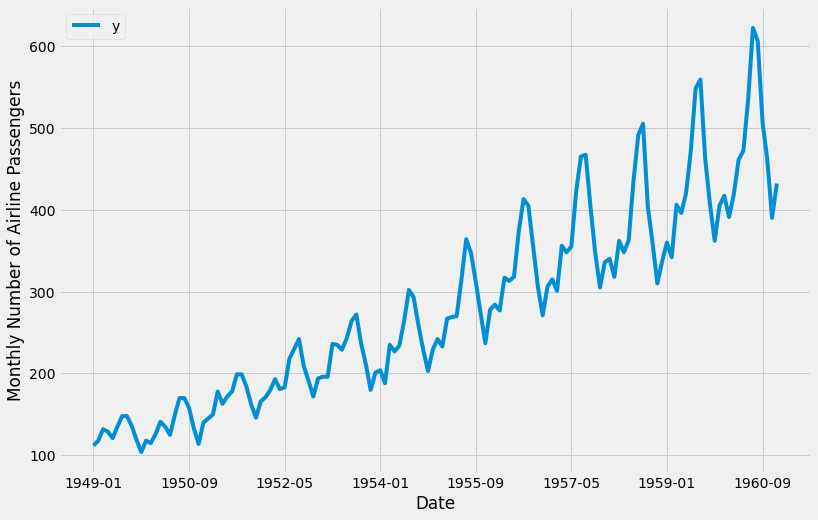

In [7]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

Now, our dataset is prepared and we are ready to use the Prophet library to produce forecasts of our time series.

<h2>6. Time Series Forecasting with Prophet</h2> 
Table of Contents

Now, we will describe how to use the Prophet library to predict future values of our time series data.

The developers of Prophet have made it more intuitive for analysts and developers alike to work with time series data.

To begin, we must instantiate a new Prophet object. Prophet enables us to specify a number of arguments. For example, we can specify the desired range of our uncertainty interval by setting the interval_width parameter.

In [8]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

Now that our Prophet model has been initialized, we can call its fit method with our DataFrame as input.

In [9]:
my_model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\ERIA\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In order to obtain forecasts of our time series, we must provide Prophet with a new DataFrame containing a ds column that holds the dates for which we want predictions.

Conveniently, we do not have to concern ourselves with manually creating this DataFrame, as Prophet provides the make_future_dataframe helper function.

In [10]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.head()

ds
0 1949-01-01
1 1949-02-01
2 1949-03-01
3 1949-04-01
4 1949-05-01

In the code snippet above, we instructed Prophet to generate 36 datestamps in the future.
When working with Prophet, it is important to consider the frequency of our time series.

Because we are working with monthly data, we clearly specified the desired frequency of the timestamps (in this case, MS is the start of the month).

Therefore, the make_future_dataframe generated 36 monthly timestamps for us.

In other words, we are looking to predict future values of our time series 3 years into the future.

The DataFrame of future dates is then used as input to the predict method of our fitted model.

In [11]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

C:\Users\ERIA\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ERIA\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



ds        yhat  yhat_lower  yhat_upper
0 1949-01-01   85.810581   43.119482  127.057201
1 1949-02-01   79.273228   33.196272  122.889252
2 1949-03-01  110.852090   66.710419  150.313525
3 1949-04-01  108.590903   65.746582  156.295045
4 1949-05-01  111.992998   67.836965  154.489068

Prophet returns a large DataFrame with many interesting columns, but we subset our output to the columns most relevant to forecasting. These are:

ds: the datestamp of the forecasted value
yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
yhat_lower: the lower bound of our forecasts
yhat_upper: the upper bound of our forecasts
A variation in values from the output presented is to be expected as Prophet relies on Markov chain Monte Carlo (MCMC) methods to generate its forecasts.

MCMC is a stochastic process, so values will be slightly different each time.

Prophet also provides a convenient function to quickly plot the results of our forecasts as follows:

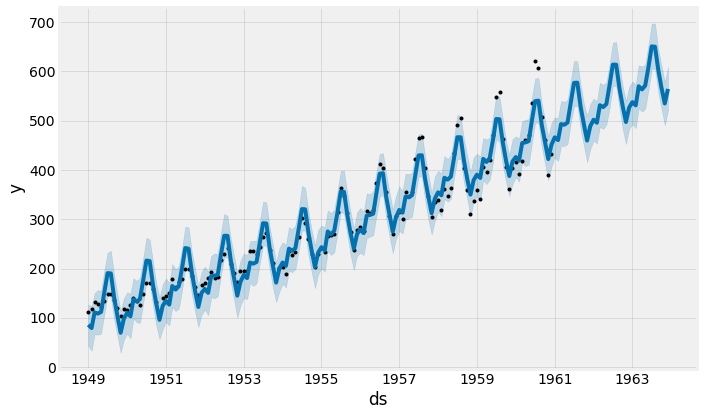

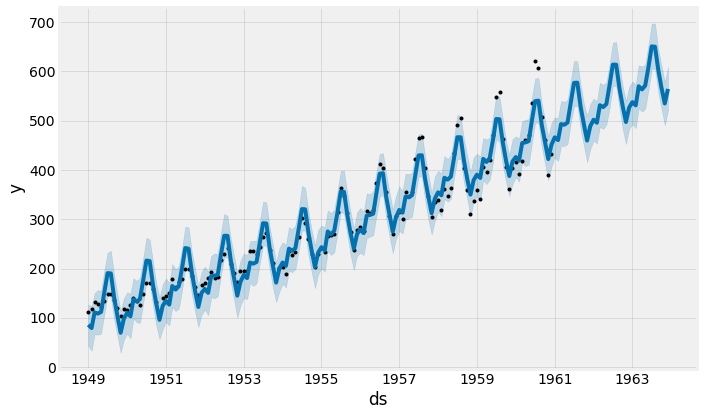

In [12]:
my_model.plot(forecast, uncertainty=True)

Prophet plots the observed values of our time series (the black dots), the forecasted values (blue line) and the uncertainty intervals of our forecasts (the blue shaded regions).
One other particularly strong feature of Prophet is its ability to return the components of our forecasts.

This can help reveal how daily, weekly and yearly patterns of the time series contribute to the overall forecasted values.

C:\Users\ERIA\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



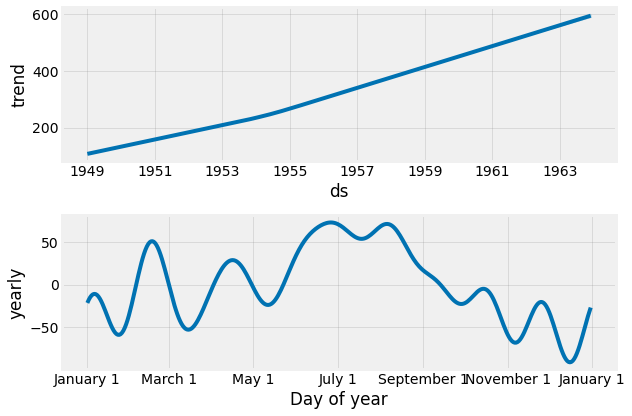

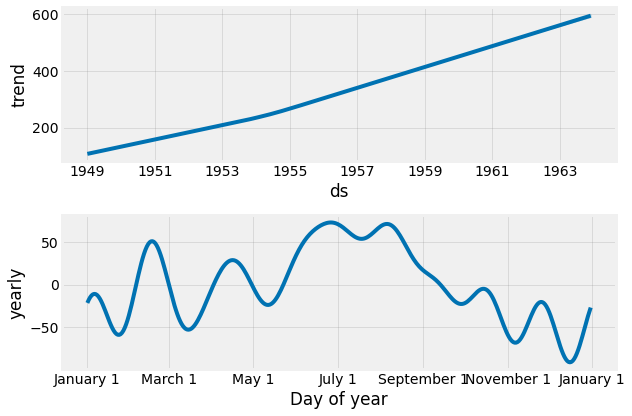

In [13]:
my_model.plot_components(forecast)

The above plot provides interesting insights.

The first plot shows that the monthly volume of airline passengers has been linearly increasing over time.

The second plot highlights the fact that the weekly count of passengers peaks towards the end of the week and on Saturday.

The third plot shows that the most traffic occurs during the holiday months of July and August.

<h2>7. Plotting the forecasted components</h2> 
Table of Contents

We can plot the trend and seasonality, components of the forecast as follows:

C:\Users\ERIA\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



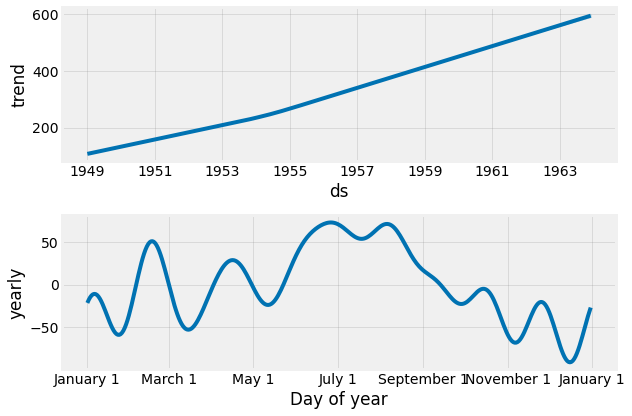

In [14]:
fig1 = my_model.plot_components(forecast)

In [15]:
forecast.head(31)

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  1949-01-01  107.263357   43.119482  127.057201   107.263357   107.263357   
1  1949-02-01  109.412472   33.196272  122.889252   109.412472   109.412472   
2  1949-03-01  111.353607   66.710419  150.313525   111.353607   111.353607   
3  1949-04-01  113.502722   65.746582  156.295045   113.502722   113.502722   
4  1949-05-01  115.582510   67.836965  154.489068   115.582510   115.582510   
5  1949-06-01  117.731624  108.379682  197.323494   117.731624   117.731624   
6  1949-07-01  119.811412  145.291577  232.234853   119.811412   119.811412   
7  1949-08-01  121.960525  141.427885  235.756082   121.960525   121.960525   
8  1949-09-01  124.109639   96.186118  186.832998   124.109639   124.109639   
9  1949-10-01  126.189426   63.667274  148.557126   126.189426   126.189426   
10 1949-11-01  128.338540   28.931206  113.363659   128.338540   128.338540   
11 1949-12-01  130.418327   55.355862  139.623046   130.418327   130.418327   
12 1950-01-01  132.567441   68.070375  151.696998   132.567441   132.567441   
13 1950-02-01  134.716555   58.012119  149.067869   134.716555   134.716555   
14 1950-03-01  136.657690   98.897874  180.209769   136.657690   136.657690   
15 1950-04-01  138.806804   90.880128  175.080080   138.806804   138.806804   
16 1950-05-01  140.886592   89.757937  180.613626   140.886592   140.886592   
17 1950-06-01  143.035705  129.423878  221.568733   143.035705   143.035705   
18 1950-07-01  145.115493  172.942952  262.423101   145.115493   145.115493   
19 1950-08-01  147.264607  171.927503  258.643637   147.264607   147.264607   
20 1950-09-01  149.413721  124.569076  213.592749   149.413721   149.413721   
21 1950-10-01  151.493508   85.123834  170.681623   151.493508   151.493508   
22 1950-11-01  153.642622   56.633207  141.116816   153.642622   153.642622   
23 1950-12-01  155.722410   77.284718  168.012381   155.722410   155.722410   
24 1951-01-01  157.871523   91.755373  179.595538   157.871523   157.871523   
25 1951-02-01  160.020637   84.562387  170.775541   160.020637   160.020637   
26 1951-03-01  161.961771  121.997882  209.405356   161.961771   161.961771   
27 1951-04-01  164.110885  113.827853  198.496308   164.110885   164.110885   
28 1951-05-01  166.190673  118.461878  204.752506   166.190673   166.190673   
29 1951-06-01  168.339787  156.135847  241.302038   168.339787   168.339787   
30 1951-07-01  170.419575  197.887473  285.240029   170.419575   170.419575   

    additive_terms  additive_terms_lower  additive_terms_upper     yearly  \
0       -21.452776            -21.452776            -21.452776 -21.452776   
1       -30.139244            -30.139244            -30.139244 -30.139244   
2        -0.501517             -0.501517             -0.501517  -0.501517   
3        -4.911819             -4.911819             -4.911819  -4.911819   
4        -3.589511             -3.589511             -3.589511  -3.589511   
5        34.329233             34.329233             34.329233  34.329233   
6        70.854449             70.854449             70.854449  70.854449   
7        68.137783             68.137783             68.137783  68.137783   
8        16.504348             16.504348             16.504348  16.504348   
9       -21.687625            -21.687625            -21.687625 -21.687625   
10      -58.648807            -58.648807            -58.648807 -58.648807   
11      -32.347701            -32.347701            -32.347701 -32.347701   
12      -22.460392            -22.460392            -22.460392 -22.460392   
13      -31.709679            -31.709679            -31.709679 -31.709679   
14        1.077453              1.077453              1.077453   1.077453   
15       -5.853061             -5.853061             -5.853061  -5.853061   
16       -2.792344             -2.792344             -2.792344  -2.792344   
17       33.491774             33.491774             33.491774  33.491774   
18       71.039745 

<h2>8. Adding ChangePoints to Prophet</h2> 
Table of Contents

Changepoints are the datetime points where the time series have abrupt changes in the trajectory.

By default, Prophet adds 25 changepoints to the initial 80% of the data-set.

Let’s plot the vertical lines where the potential changepoints occurred.

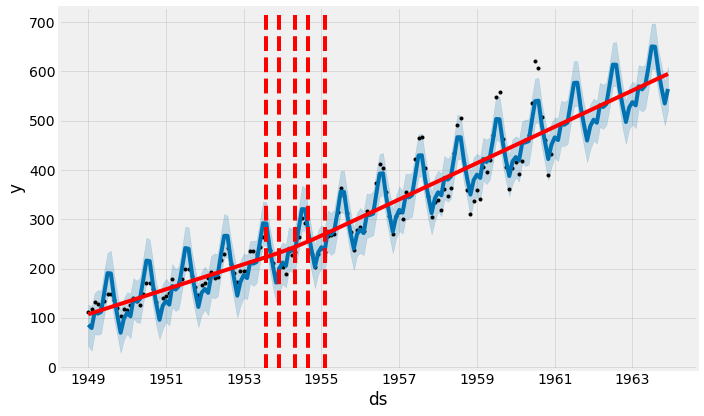

In [17]:
from prophet.plot import add_changepoints_to_plot
fig = my_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), my_model, forecast)

We can view the dates where the chagepoints occurred.

In [19]:
my_model.changepoints

5     1949-06-01
9     1949-10-01
14    1950-03-01
18    1950-07-01
23    1950-12-01
27    1951-04-01
32    1951-09-01
36    1952-01-01
41    1952-06-01
46    1952-11-01
50    1953-03-01
55    1953-08-01
59    1953-12-01
64    1954-05-01
68    1954-09-01
73    1955-02-01
78    1955-07-01
82    1955-11-01
87    1956-04-01
91    1956-08-01
96    1957-01-01
100   1957-05-01
105   1957-10-01
109   1958-02-01
114   1958-07-01
Name: ds, dtype: datetime64[ns]

We can change the inferred changepoint range by setting the changepoint_range

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\ERIA\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ERIA\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ERIA\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



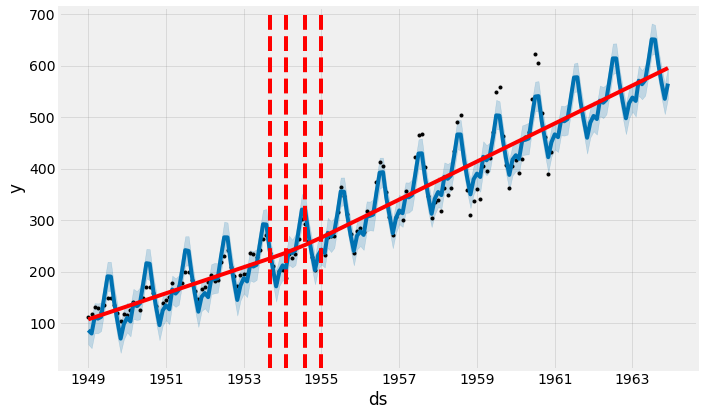

In [20]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

The number of changepoints can be set by using the n_changepoints parameter when initializing prophet.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\ERIA\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ERIA\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ERIA\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



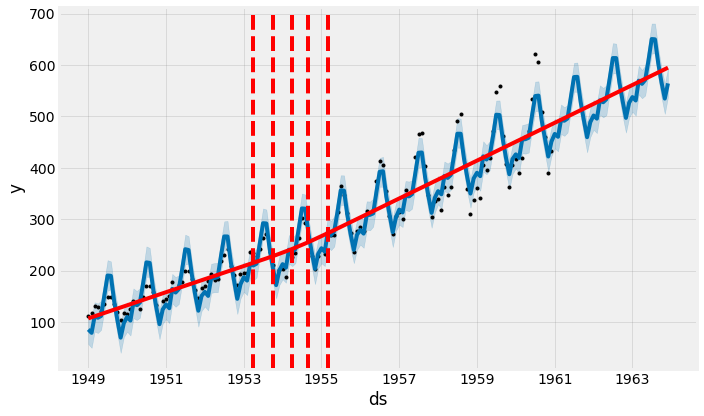

In [21]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

<h2>9. Adjusting Trend </h2>
Table of Contents

Prophet allows us to adjust the trend in case there is an overfit or underfit.

changepoint_prior_scale helps adjust the strength of the trend.

Default value for changepoint_prior_scale is 0.05.

Decrease the value to make the trend less flexible.

Increase the value of changepoint_prior_scale to make the trend more flexible.

Increasing the changepoint_prior_scale to 0.08 to make the trend flexible.



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\ERIA\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ERIA\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ERIA\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



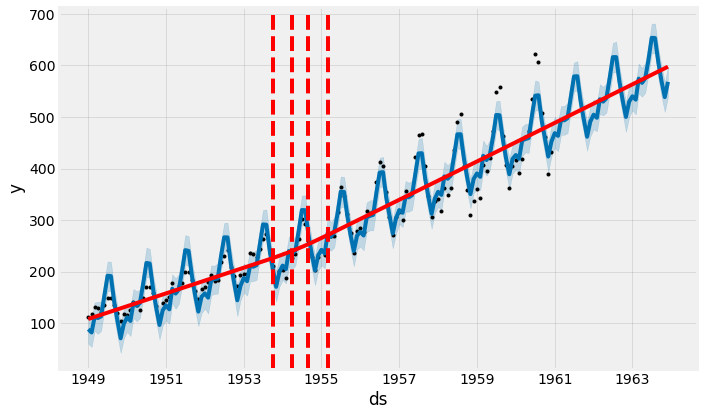

In [22]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

Decreasing the changepoint_prior_scale to 0.001 to make the trend less flexible

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\ERIA\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ERIA\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ERIA\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



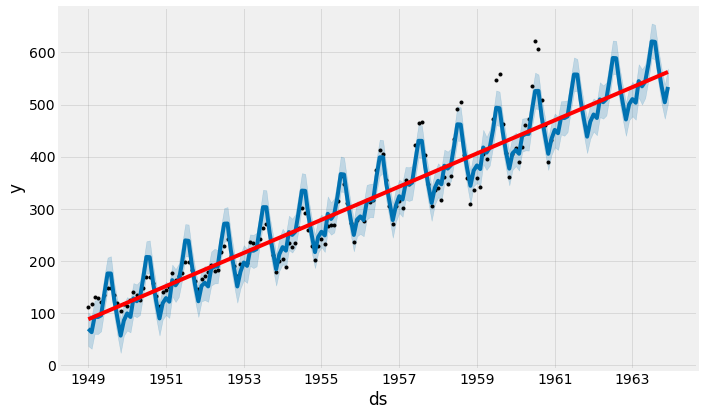

In [23]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)